In [1]:
!pip install tensorflow opencv-contrib-python youtube-dl moviepy pydot

     ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/45.3 MB 1.3 MB/s eta 0:00:36
     ---------------------------------------- 0.1/45.3 MB 1.0 MB/s eta 0:00:44
     ---------------------------------------- 0.2/45.3 MB 1.5 MB/s eta 0:00:31
     ---------------------------------------- 0.4/45.3 MB 2.2 MB/s eta 0:00:21
      --------------------------------------- 0.7/45.3 MB 3.1 MB/s eta 0:00:15
      --------------------------------------- 0.7/45.3 MB 3.2 MB/s eta 0:00:14
      --------------------------------------- 0.8/45.3 MB 2.5 MB/s eta 0:00:18
      --------------------------------------- 0.9/45.3 MB 2.7 MB/s eta 0:00:17
     - -------------------------------------- 1.2/45.3 MB 3.0 MB/s eta 0:00:15
     - -------------------------------------- 1.2/45.3 MB 3.0 MB/s eta 0:00:15
     - -------------------------------------- 1.2/45.3 MB 3.0 MB/s eta 0:00:15
     - -------------------------------------- 2.2/45.3 MB 4


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install git+https://github.com/TahaAnwar/pafy.git#egg=pafy

  Cloning https://github.com/TahaAnwar/pafy.git to c:\users\k_dys\appdata\local\temp\pip-install-z388_22p\pafy_835731804cba46c793e4465559e1991e
  Resolved https://github.com/TahaAnwar/pafy.git to commit 2f3c473b3df7961721d07e1504675313afd1d2cb
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pafy: filename=pafy-0.5.5-py2.py3-none-any.whl size=36023 sha256=85187afb1c84cf311edbff2c3c73d23549ae622bce65e33c372a8596fcd9add3
  Stored in directory: C:\Users\k_dys\AppData\Local\Temp\pip-ephem-wheel-cache-b0nwhlfs\wheels\38\75\72\035d5f91837fe6fdd9ee6ec71eadaf7829068a58f4789a63cc
Successfully built pafy


  Running command git clone --filter=blob:none --quiet https://github.com/TahaAnwar/pafy.git 'C:\Users\k_dys\AppData\Local\Temp\pip-install-z388_22p\pafy_835731804cba46c793e4465559e1991e'

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
from moviepy.editor import *

%matplotlib inline
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 42, 17, 46, 23, 1, 31, 6, 24, 29, 7]
[47, 49, 42, 9, 7, 33, 4, 24, 6, 19, 4

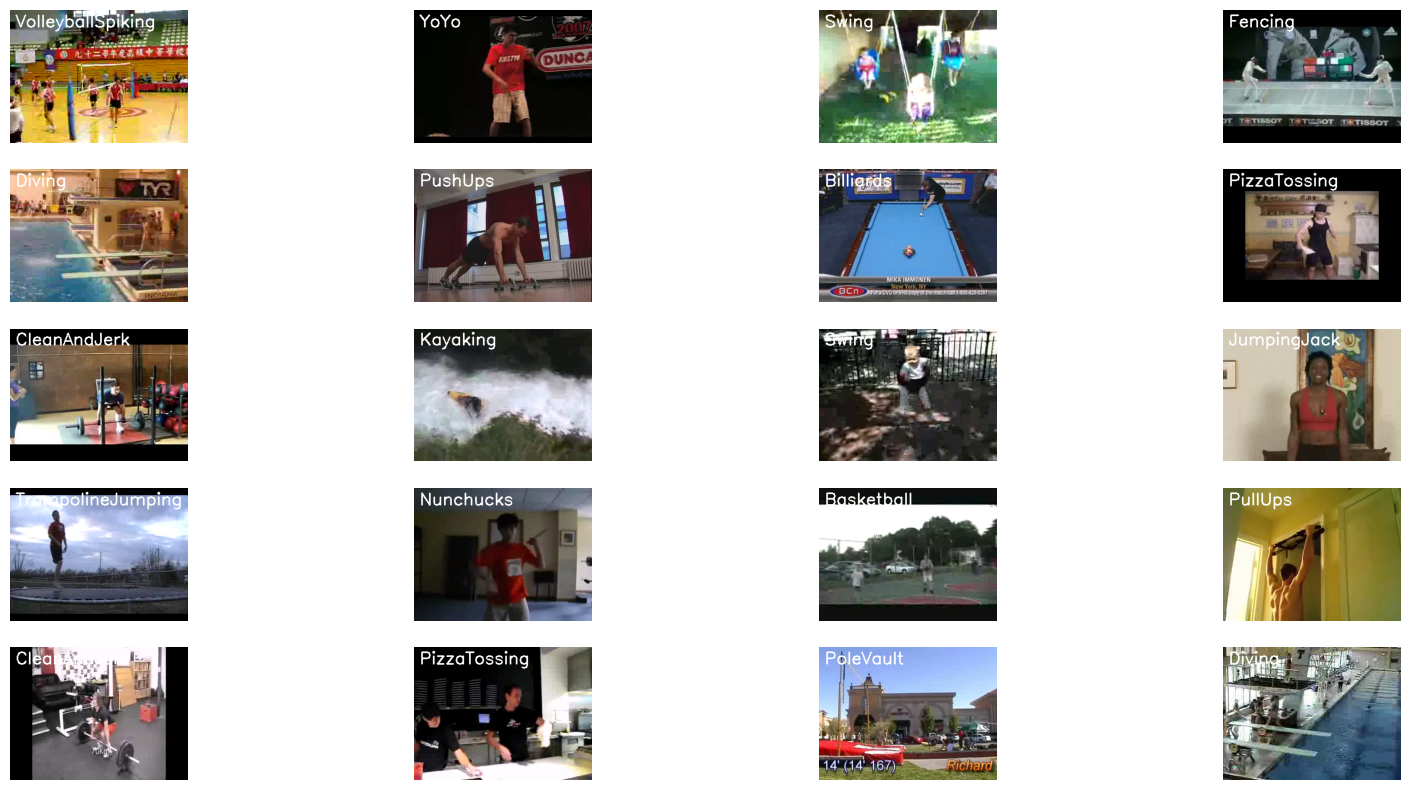

In [2]:
plt.figure(figsize = (20,10))

all_classes_names = os.listdir('datasets/l8/dataset/UCF50')

random_range = random.sample(range(len(all_classes_names)), 20)
random_range = [random.randint(0,len(all_classes_names)) for _ in range(20)]

for counter,random_index in enumerate(random_range,1):
    print(random_range)
    selected_class_Name = all_classes_names[random_index]
    
    video_files_names_list = os.listdir(f'datasets/l8/dataset/UCF50/{selected_class_Name}')
    
    selected_video_file_name = random.choice(video_files_names_list)
    
    video_reader = cv2.VideoCapture(f'datasets/l8/dataset/UCF50/{selected_class_Name}/{selected_video_file_name}')
    
    _, bgr_frame = video_reader.read()
    
    video_reader.release()
    
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    
    cv2.putText(rgb_frame, selected_class_Name, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255),2)
    
    plt.subplot(5, 4, counter); plt.imshow(rgb_frame); plt.axis('off')

In [4]:
IMAGE_HEIGHT, IMAGE_WIDTH = 64,64

SEQUENCE_LENGTH = 20

DATASET_DIR = 'datasets/l8/dataset/UCF50'

CLASSES_LIST = ['WalkingWithDog', 'TaiChi', 'Swing', 'HorseRace']

In [5]:
def frames_extraction(video_path):
    frames_list = []
    
    video_reader = cv2.VideoCapture(video_path)
    
    video_frame_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    
    skip_frames_window = max(int(video_frame_count/SEQUENCE_LENGTH), 1)
    
    for frame_counter in range(SEQUENCE_LENGTH):
        
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        
        success, frame = video_reader.read()
        
        if not success:
            break
        
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        normalized_frame = resized_frame/255
        
        frames_list.append(normalized_frame)
        
    video_reader.release()
        
    return frames_list

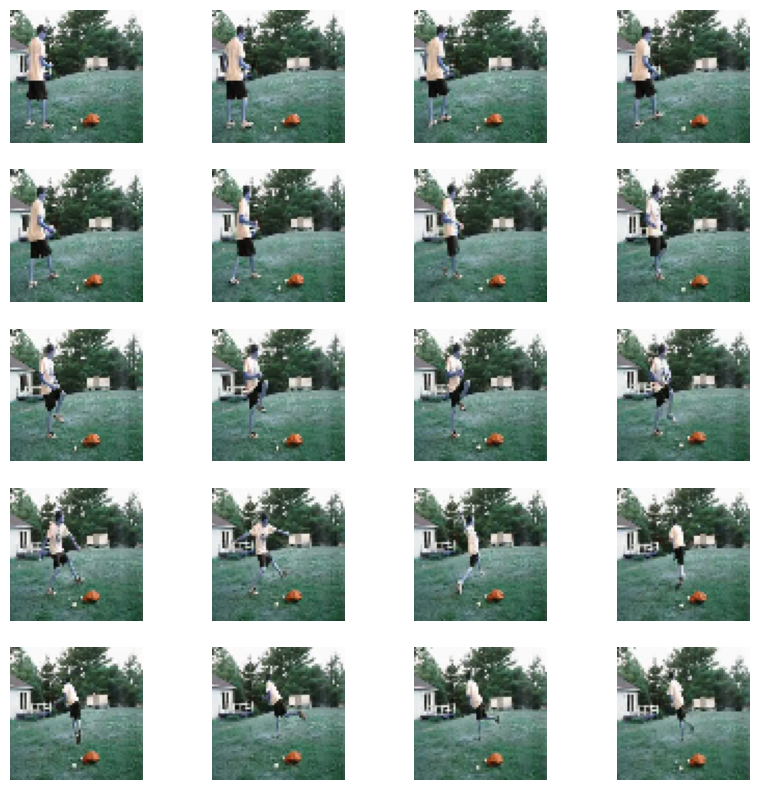

In [6]:
plt.figure(figsize = (10,10))
ctr = 1
for i in frames_extraction(f'{DATASET_DIR}/BaseballPitch/v_BaseballPitch_g01_c01.avi'):
    plt.subplot(5, 4, ctr); plt.imshow(i); plt.axis('off')
    ctr+=1


In [7]:
def create_dataset():
    features = []
    labels = []
    video_files_paths = []
    
    for class_index, class_name in enumerate(CLASSES_LIST):
        print(f'exctracting Data of class: {class_name}')
        
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        for file_name in files_list:
            
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
            
            frames = frames_extraction(video_file_path)
            
            if len(frames) == SEQUENCE_LENGTH:
                
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)
                
    features = np.array(features)
    labels = np.array(labels)
    
    return features, labels, video_files_paths

In [8]:
features, labels, video_files_paths = create_dataset()

exctracting Data of class: WalkingWithDog
exctracting Data of class: TaiChi
exctracting Data of class: Swing
exctracting Data of class: HorseRace


In [9]:
one_hot_encoded_labels = to_categorical(labels)

In [10]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size=0.25, shuffle=True)

CONV запихиваем в RNN блоки, а во второй модели сначала применяем ко всем а потом в LSTM

In [11]:
def create_convlstm():
    
    model = Sequential()
    
    model.add(ConvLSTM2D(filters = 4, kernel_size=(3,3), activation = 'tanh', data_format='channels_last',
              recurrent_dropout = 0.2, return_sequences = True, input_shape = (SEQUENCE_LENGTH, 
                                                                               IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(MaxPooling3D(pool_size = (1,2,2), padding = 'same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 8, kernel_size=(3,3), activation = 'tanh', data_format='channels_last',
              recurrent_dropout = 0.2, return_sequences = True, input_shape = (SEQUENCE_LENGTH, 
                                                                               IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(MaxPooling3D(pool_size = (1,2,2), padding = 'same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 14, kernel_size=(3,3), activation = 'tanh', data_format='channels_last',
              recurrent_dropout = 0.2, return_sequences = True, input_shape = (SEQUENCE_LENGTH, 
                                                                               IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(MaxPooling3D(pool_size = (1,2,2), padding = 'same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    
    # model.add(ConvLSTM2D(filters = 16, kernel_size=(3,3), activation = 'tanh', data_format='channels_last',
    #           recurrent_dropout = 0.2, return_sequences = True, input_shape = (SEQUENCE_LENGTH, 
    #                                                                            IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    # model.add(MaxPooling3D(pool_size = (1,2,2), padding = 'same', data_format='channels_last'))
    # model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(Flatten())
    
    model.add(Dense(len(CLASSES_LIST), activation='softmax'))
    
    model.summary()
    
    return model

In [12]:
model = create_convlstm()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)        │ (None, 20, 62, 62, 4)  │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 20, 31, 31, 4)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 20, 31, 31, 4)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_1 (ConvLSTM2D)      │ (None, 20, 29, 29, 8)  │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 20, 15, 15, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 20, 15, 15, 8)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_2 (ConvLSTM2D)      │ (None, 20, 13, 13, 14) │        11,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 20, 7, 7, 14)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 20, 7, 7, 14)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │        54,884 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,540 (275.55 KB)

 Trainable params: 70,540 (275.55 KB)

 Non-trainable params: 0 (0.00 B)

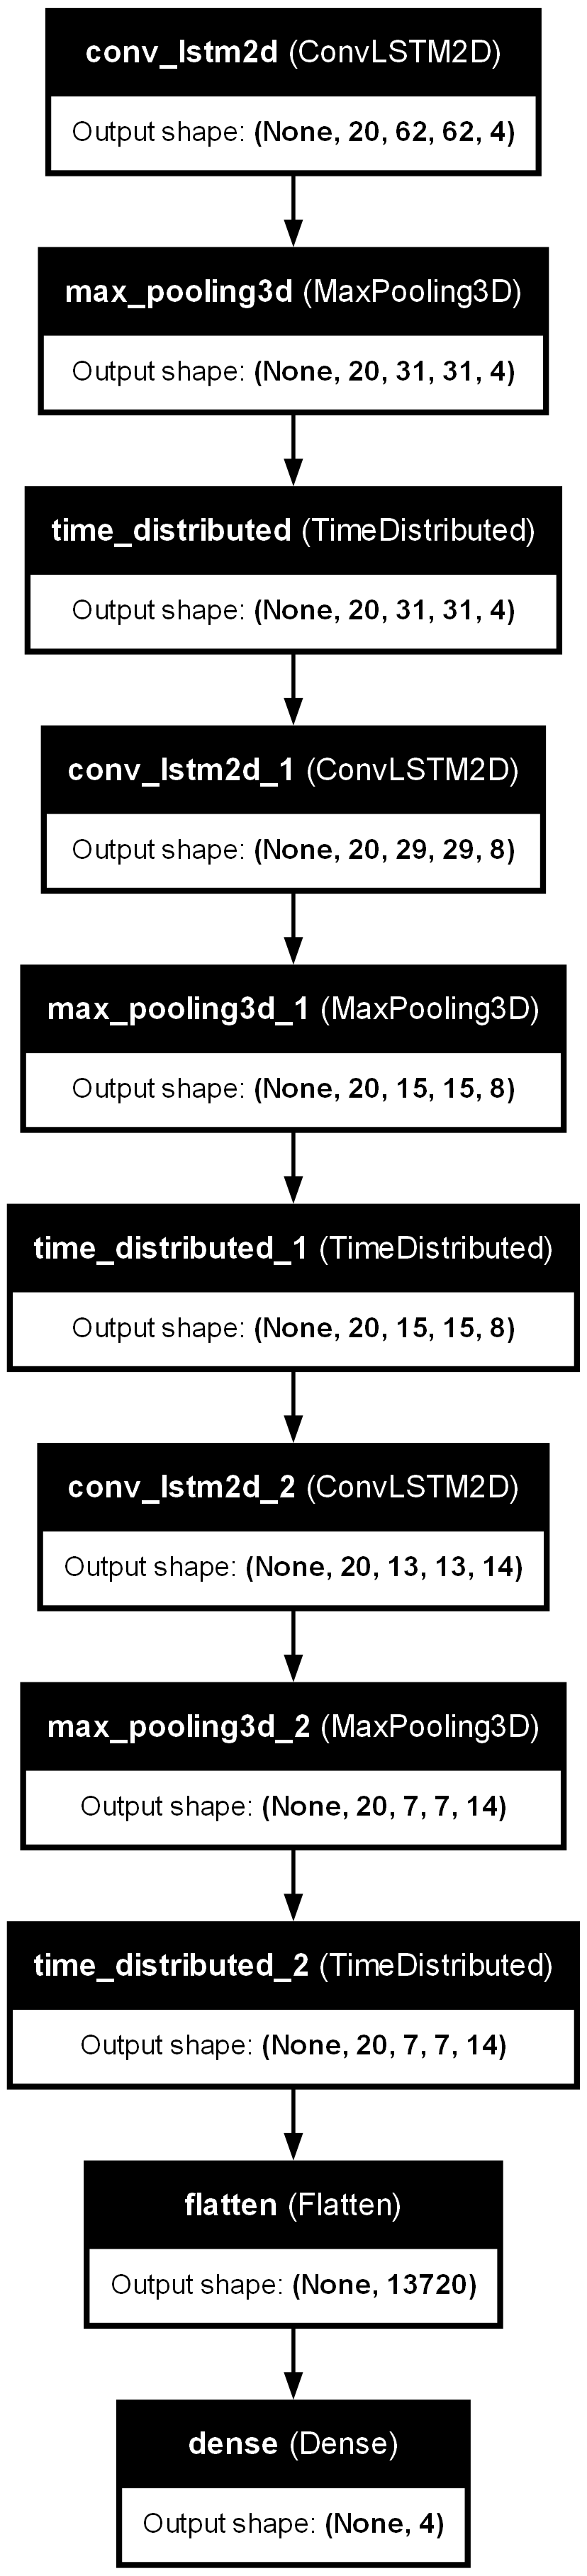

In [13]:
plot_model(model, to_file='conv_model_struc_plot.png', show_shapes=True, show_layer_names = True)

In [16]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights=True)

model.compile(loss = 'categorical_crossentropy', optimizer ='Adam', metrics = ['accuracy'])

model_training_history = model.fit(x = features_train, y = labels_train, epochs = 10, batch_size = 4,
                                   shuffle = True, validation_split = 0.2,
                                   callbacks = [early_stopping_callback])

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 29s 286ms/step - accuracy: 0.3928 - loss: 1.2848 - val_accuracy: 0.5890 - val_loss: 1.0254
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.6423 - loss: 0.8171 - val_accuracy: 0.6575 - val_loss: 0.8759
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.8005 - loss: 0.5294 - val_accuracy: 0.6849 - val_loss: 0.7936
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 208ms/step - accuracy: 0.8710 - loss: 0.3932 - val_accuracy: 0.7123 - val_loss: 0.7292
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.9328 - loss: 0.2553 - val_accuracy: 0.6712 - val_loss: 1.1258
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.9050 - loss: 0.2745 - val_accuracy: 0.7397 - val_loss: 1.1154
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.9359 - loss: 0.1801 - val_accuracy: 0.8219 - val_loss: 1.0237
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.9448 - loss: 0.1261 - val_accurac

In [31]:
model_eval_history = model.evaluate(features_test, labels_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.7802 - loss: 0.4990


In [19]:
model_eval_loss, model_eval_accuracy = model_eval_history

date_time_format = "%Y_%m_%d_%H_%M_%S"
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

model_file_name = f'convlstm_model_datetime_{current_date_time_string}_loss_{model_eval_loss}_acc_{model_eval_accuracy}.h5'

model.save(model_file_name)

In [22]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    epochs = range(len(metric_value_1))
    
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
    
    plt.title(str(plot_name))
    
    plt.legend()

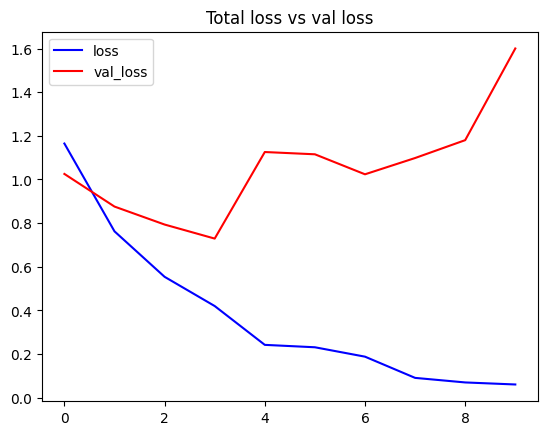

In [24]:
plot_metric(model_training_history, 'loss', 'val_loss', 'Total loss vs val loss')

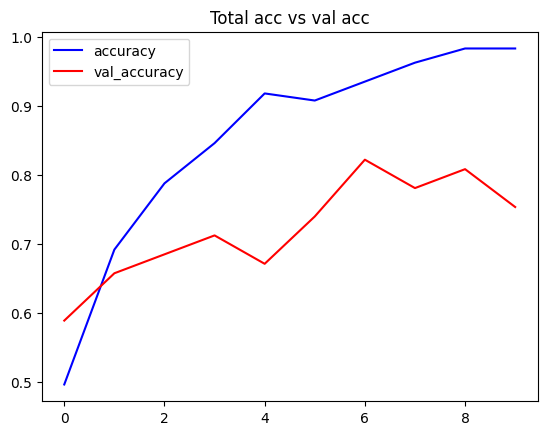

In [25]:
plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'Total acc vs val acc')

In [28]:
def create_lrcn():
    
    model = Sequential()
    
    model.add(TimeDistributed(Conv2D(16, (3,3), padding = 'same', activation = 'relu'),
              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D(4,4)))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3,3), padding = 'same', activation = 'relu'),
              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D(4,4)))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D(2,2)))
    model.add(TimeDistributed(Dropout(0.25)))
    
    
    # model.add(ConvLSTM2D(filters = 16, kernel_size=(3,3), activation = 'tanh', data_format='channels_last',
    #           recurrent_dropout = 0.2, return_sequences = True, input_shape = (SEQUENCE_LENGTH, 
    #                                                                            IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    # model.add(MaxPooling3D(pool_size = (1,2,2), padding = 'same', data_format='channels_last'))
    # model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(TimeDistributed(Flatten()))
    
    model.add(LSTM(32))
    
    model.add(Dense(len(CLASSES_LIST), activation='softmax'))
    
    model.summary()
    
    return model

In [29]:
lrcn = create_lrcn()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_13             │ (None, 20, 64, 64, 16) │           448 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 20, 16, 16, 32) │         4,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_18             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 20, 4, 4, 64)   │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_20             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_21             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_22             │ (None, 20, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,708 (237.14 KB)

 Trainable params: 60,708 (237.14 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights=True)

lrcn.compile(loss = 'categorical_crossentropy', optimizer ='Adam', metrics = ['accuracy'])

model_training_history = lrcn.fit(x = features_train, y = labels_train, epochs = 10, batch_size = 4,
                                   shuffle = True, validation_split = 0.2,
                                   callbacks = [early_stopping_callback])

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.2921 - loss: 1.4164 - val_accuracy: 0.2740 - val_loss: 1.3685
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.3993 - loss: 1.3150 - val_accuracy: 0.4247 - val_loss: 1.2940
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.4626 - loss: 1.1930 - val_accuracy: 0.4110 - val_loss: 1.3125
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.5593 - loss: 1.0548 - val_accuracy: 0.4247 - val_loss: 1.2431
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.6487 - loss: 0.9569 - val_accuracy: 0.4384 - val_loss: 1.4870
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.6042 - loss: 1.0567 - val_accuracy: 0.5753 - val_loss: 0.9449
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.6960 - loss: 0.7464 - val_accuracy: 0.6438 - val_loss: 0.7470
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.7330 - loss: 0.7121 - val_accuracy: 0

In [32]:
model_eval_history = lrcn.evaluate(features_test, labels_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7454 - loss: 0.7376


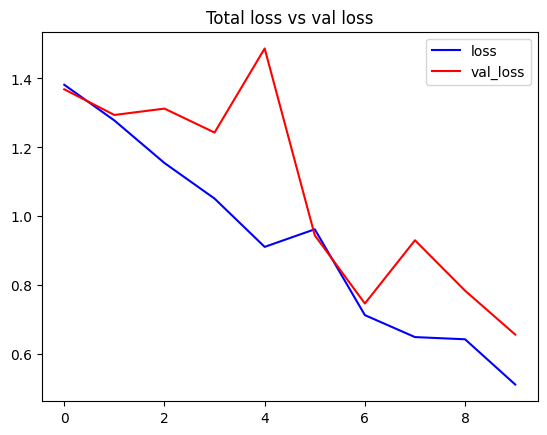

In [33]:
plot_metric(model_training_history, 'loss', 'val_loss', 'Total loss vs val loss')

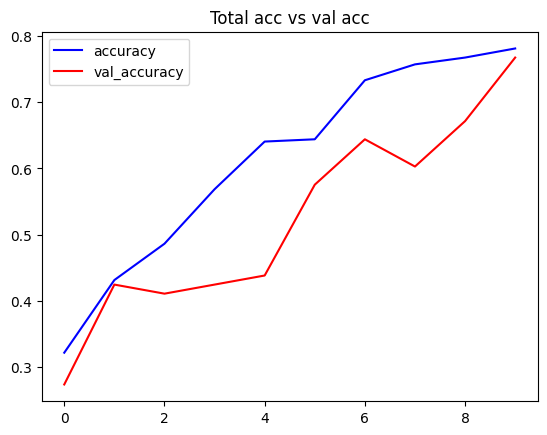

In [34]:
plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'Total acc vs val acc')

In [35]:
def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    
    video_reader = cv2.VideoCapture(video_file_path)
    
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4','V'),
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
    
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)
    
    predicted_class_name = ""
    
    while video_reader.isOpened():
        
        ok, frame = video_reader.read()
        
        if not ok:
            break
        
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        normalized_frame = resized_frame/255
        
        frames_queue.append(normalized_frame)
        
        if len(frames_queue)==SEQUENCE_LENGTH:
            
            predicted_labels_probabilities = lrcn.predict(np.expand_dims(frames_queue, axis = 0))[0]
            
            predicted_label = np.argmax(predicted_labels_probabilities)
            
            predicted_class_name = CLASSES_LIST[predicted_label]
            
        cv2.putText(frame, predicted_class_name, (10,30), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0),2)
        
        video_writer.write(frame)
        
    video_reader.release()
    video_writer.release()

In [36]:

input_video_file_path = f'datasets/l8/test_videos/videoplayback.mp4'
output_video_file_path = f'datasets/l8/test_videos/hehehaha_videoplayback.mp4'

predict_on_video(input_video_file_path,output_video_file_path, SEQUENCE_LENGTH)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━